# Missing Data

Missing data refers to the absence of values in a dataset, which can occur due to various reasons such as data collection errors, survey non-responses, or technical issues. Addressing missing data is a critical aspect of data preprocessing in machine learning and data analysis. Ignoring missing values can lead to biased or inaccurate results, as well as skewed statistical inferences. Handling missing data involves making informed decisions based on the nature of the data and the problem at hand. Common strategies include imputation, where missing values are estimated based on existing data, and deletion, where incomplete records are removed. The choice of strategy depends on factors like the amount of missing data, the potential impact on model performance, and the underlying assumptions of the analysis. Effective management of missing data contributes to the reliability and validity of analytical outcomes and helps ensure that machine learning models make informed predictions based on complete and accurate information.

**Importing Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


**Reading the dataset**

In [2]:
df = pd.read_csv('/kaggle/input/house-price-prediction-dataset/Housing_Price_Data.csv')

df.head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


**Dropping the index**

In [3]:
# Dropping PID as it is ID of each row and is not needed
df = df.drop('PID', axis=1)

df.head()

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


**Checking the null values**

In [6]:
# Now we want to see which columns are missing. The true output are missing
df.isnull().sum() > 0

MS SubClass       False
MS Zoning         False
Lot Frontage       True
Lot Area          False
Street            False
                  ...  
Mo Sold           False
Yr Sold           False
Sale Type         False
Sale Condition    False
SalePrice         False
Length: 80, dtype: bool

**A function for missing data**

In [16]:
# Now we need to find what percentage of data is missing in a column. Let's make a function
# for it

def percentage_missing(df):
    percent_nan = 100*(df.isnull().sum() / len(df))
    percent_nan = percent_nan[percent_nan>0].sort_values()

    return percent_nan

In [20]:
# Higher the value, higher the missing values in that column

percent_nan = percentage_missing(df)
print(percent_nan)

Electrical         0.034130
Garage Area        0.034130
Total Bsmt SF      0.034130
Bsmt Unf SF        0.034130
BsmtFin SF 1       0.034130
BsmtFin SF 2       0.034130
Garage Cars        0.034130
Bsmt Full Bath     0.068259
Bsmt Half Bath     0.068259
Mas Vnr Area       0.784983
Mas Vnr Type       0.784983
BsmtFin Type 1     2.730375
Bsmt Qual          2.730375
Bsmt Cond          2.730375
BsmtFin Type 2     2.764505
Bsmt Exposure      2.832765
Garage Type        5.358362
Garage Finish      5.426621
Garage Qual        5.426621
Garage Cond        5.426621
Garage Yr Blt      5.426621
Lot Frontage      16.723549
Fireplace Qu      48.532423
Fence             80.477816
Alley             93.242321
Misc Feature      96.382253
Pool QC           99.556314
dtype: float64


**Visualizing It**

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26]),
 [Text(0, 0, 'Electrical'),
  Text(1, 0, 'Garage Area'),
  Text(2, 0, 'Total Bsmt SF'),
  Text(3, 0, 'Bsmt Unf SF'),
  Text(4, 0, 'BsmtFin SF 1'),
  Text(5, 0, 'BsmtFin SF 2'),
  Text(6, 0, 'Garage Cars'),
  Text(7, 0, 'Bsmt Full Bath'),
  Text(8, 0, 'Bsmt Half Bath'),
  Text(9, 0, 'Mas Vnr Area'),
  Text(10, 0, 'Mas Vnr Type'),
  Text(11, 0, 'BsmtFin Type 1'),
  Text(12, 0, 'Bsmt Qual'),
  Text(13, 0, 'Bsmt Cond'),
  Text(14, 0, 'BsmtFin Type 2'),
  Text(15, 0, 'Bsmt Exposure'),
  Text(16, 0, 'Garage Type'),
  Text(17, 0, 'Garage Finish'),
  Text(18, 0, 'Garage Qual'),
  Text(19, 0, 'Garage Cond'),
  Text(20, 0, 'Garage Yr Blt'),
  Text(21, 0, 'Lot Frontage'),
  Text(22, 0, 'Fireplace Qu'),
  Text(23, 0, 'Fence'),
  Text(24, 0, 'Alley'),
  Text(25, 0, 'Misc Feature'),
  Text(26, 0, 'Pool QC')])

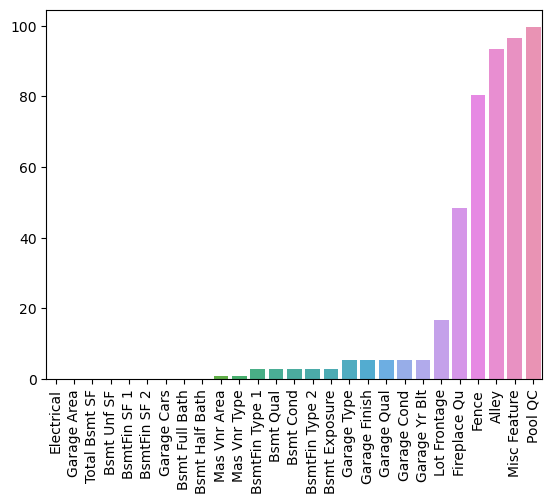

In [21]:
sns.barplot(x=percent_nan.index, y=percent_nan)
plt.xticks(rotation=90)

**Finding the rows that has less than 1% data missing**

(0.0, 1.0)

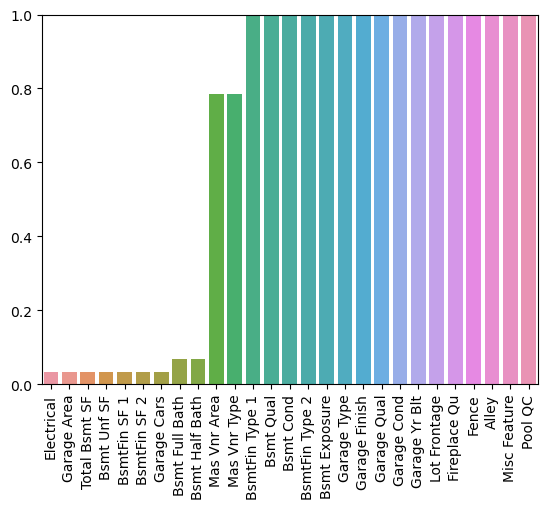

In [22]:
sns.barplot(x=percent_nan.index, y=percent_nan)
plt.xticks(rotation=90)
plt.ylim(0,1)

**Filling missing data in rows**

In [29]:
# Filling the basement values

# For numeric columns, fill 0
bsmt_num_cols = ['BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Garage Cars', 'Garage Area']

df[bsmt_num_cols] = df[bsmt_num_cols].fillna(0)

# For string column, fill "None"
bsmt_str_cols = ['Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2', 'Electrical']
df[bsmt_str_cols] = df[bsmt_str_cols].fillna('None')

**Let's Re-Visualize The Data**

(0.0, 1.0)

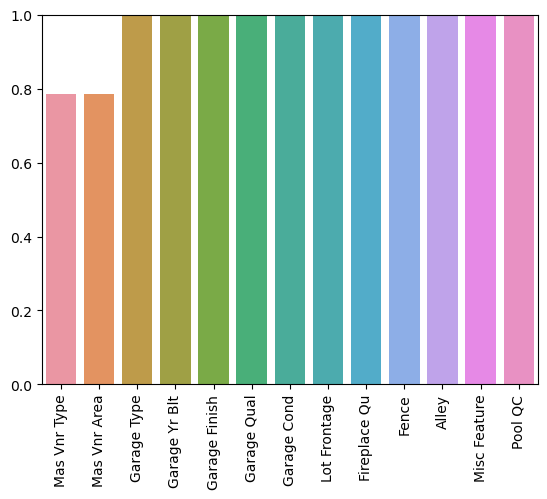

In [30]:
percent_nan = percentage_missing(df)

sns.barplot(x=percent_nan.index, y=percent_nan)
plt.xticks(rotation=90)
plt.ylim(0,1)

In [31]:
# Let's fill Mas Vnr Type and Mas Vnr Area

df['Mas Vnr Type'] = df['Mas Vnr Type'].fillna('None')


df['Mas Vnr Area'] = df["Mas Vnr Area"].fillna(0)


(0.0, 1.0)

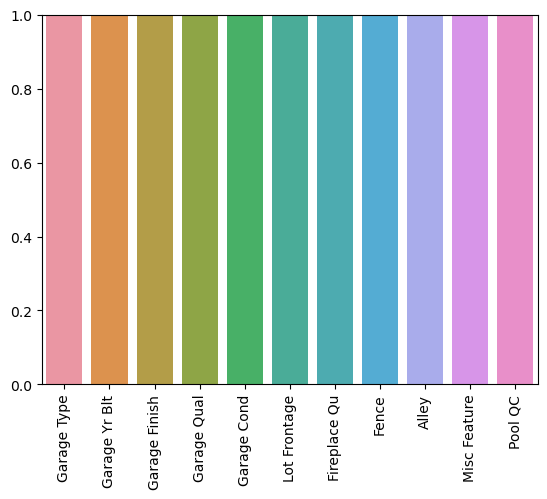

In [32]:
# Let's re-visualize

percent_nan = percentage_missing(df)

sns.barplot(x=percent_nan.index, y=percent_nan)
plt.xticks(rotation=90)
plt.ylim(0,1)

# So we've filled all the missing data (< 1%) with some values. 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'Garage Type'),
  Text(1, 0, 'Garage Yr Blt'),
  Text(2, 0, 'Garage Finish'),
  Text(3, 0, 'Garage Qual'),
  Text(4, 0, 'Garage Cond'),
  Text(5, 0, 'Lot Frontage'),
  Text(6, 0, 'Fireplace Qu'),
  Text(7, 0, 'Fence'),
  Text(8, 0, 'Alley'),
  Text(9, 0, 'Misc Feature'),
  Text(10, 0, 'Pool QC')])

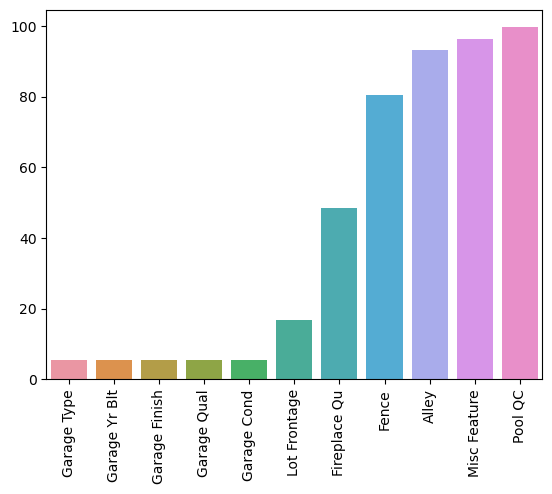

In [33]:
sns.barplot(x=percent_nan.index, y=percent_nan)
plt.xticks(rotation=90)

**Drop Columns With More Than 90% Missing Data**

In [36]:
# These columns are Alley, Misc Feature, and Pool QC. We are dropping them because they
# have very high percentage of missing data that can confuse our models

print(percent_nan)

to_drop = ['Alley', 'Misc Feature', 'Pool QC']

df = df.drop(to_drop, axis=1)

Garage Type       5.358362
Garage Yr Blt     5.426621
Garage Finish     5.426621
Garage Qual       5.426621
Garage Cond       5.426621
Lot Frontage     16.723549
Fireplace Qu     48.532423
Fence            80.477816
Alley            93.242321
Misc Feature     96.382253
Pool QC          99.556314
dtype: float64


In [38]:
percent_nan = percentage_missing(df)

print(percent_nan)

Garage Type       5.358362
Garage Yr Blt     5.426621
Garage Finish     5.426621
Garage Qual       5.426621
Garage Cond       5.426621
Lot Frontage     16.723549
Fireplace Qu     48.532423
Fence            80.477816
dtype: float64


**Filling Rest Of The Values**

In [51]:
# For numerical missing values, we can fill them with mean.
# For string values, we can fill them with mode.
# Let's do one of each.

mode_of_fence = df['Fence'].mode()

print(mode_of_fence)

df['Fence'] = df['Fence'].fillna('MnPrv')

percent_nan = percentage_missing(df)

print(percent_nan)

# Successfully done

0    MnPrv
Name: Fence, dtype: object
Garage Type       5.358362
Garage Yr Blt     5.426621
Garage Finish     5.426621
Garage Qual       5.426621
Garage Cond       5.426621
Lot Frontage     16.723549
Fireplace Qu     48.532423
dtype: float64


In [58]:
mean_of_lot_frontage = df['Lot Frontage'].mean()
mean = round(mean_of_lot_frontage)
print(mean)

df['Lot Frontage'] = df['Lot Frontage'].fillna(mean)

percent_nan = percentage_missing(df)

print(percent_nan)

# Successfully done

69
Garage Type       5.358362
Garage Yr Blt     5.426621
Garage Finish     5.426621
Garage Qual       5.426621
Garage Cond       5.426621
Fireplace Qu     48.532423
dtype: float64
